<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap10/10_4_Downsampling_and_Upsampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 10.4: Downsampling and Upsampling**

This notebook investigates the upsampling and downsampling methods discussed in section 10.4 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.


In [93]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

In [94]:
# Define 4 by 4 original patch
orig_4_4 = np.array([[1, 3, 5,3 ], [6,2,0,8], [4,6,1,4], [2,8,0,3]])
print(orig_4_4)

[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]


In [95]:
def subsample(x_in):
    x_out = np.zeros(( int(np.ceil(x_in.shape[0]/2)), int(np.ceil(x_in.shape[1]/2)) ))
    # TODO -- write the subsampling routine
    # Replace this line
    # Take every other with step two
    x_out = x_in[::2, ::2]


    return x_out

In [96]:
print("Original:")
print(orig_4_4)
print("Subsampled:")
print(subsample(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Subsampled:
[[1 5]
 [4 1]]


Let's try that on an image to get a feel for how it works:

In [97]:
!wget https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap10/test_image.png

'wget' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


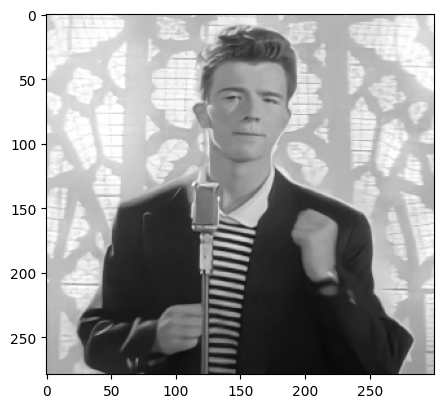

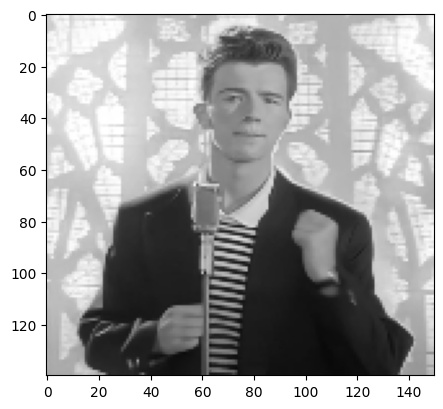

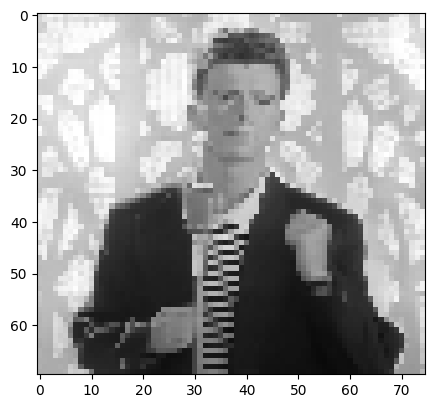

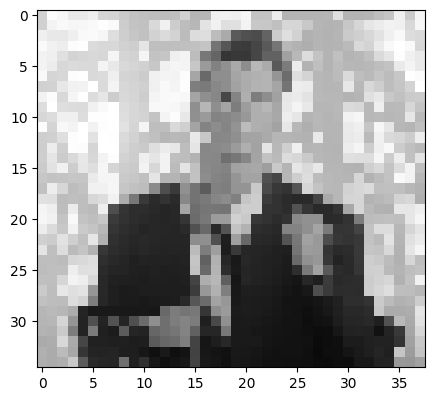

In [98]:
# load the image
image = Image.open('test_image.png')
# convert image to numpy array
data = asarray(image)
data_subsample = subsample(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_subsample, cmap='gray')
plt.show()

data_subsample2 = subsample(data_subsample)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample2, cmap='gray')
plt.show()

data_subsample3 = subsample(data_subsample2)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

In [99]:
# Now let's try max-pooling
def maxpool(x_in):
    x_out = np.zeros(( int(np.floor(x_in.shape[0]/2)), int(np.floor(x_in.shape[1]/2)) ))
    # TODO -- write the maxpool routine
    # Replace this line
    for i in range(x_out.shape[0]):
        for j in range(x_out.shape[1]):
            i_in = 2 * i
            j_in = 2 * j
            
            region = x_in[i_in:min(i_in + 2, x_in.shape[0]), 
                          j_in:min(j_in + 2, x_in.shape[1])]
            
            x_out[i,j] = np.max(region)

    return x_out

In [100]:
print("Original:")
print(orig_4_4)
print("Maxpooled:")
print(maxpool(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Maxpooled:
[[6. 8.]
 [8. 4.]]


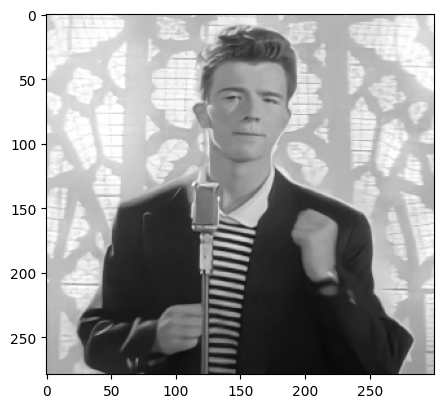

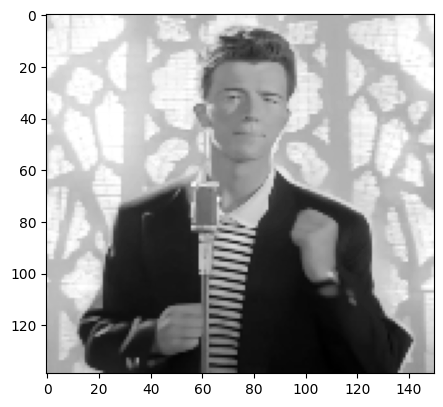

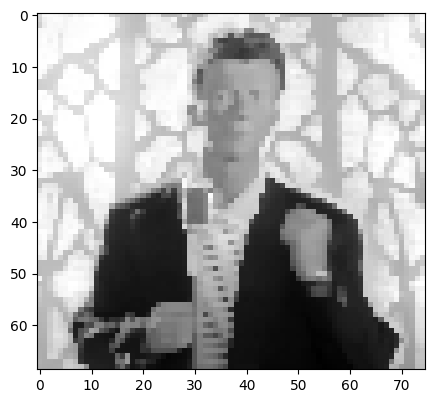

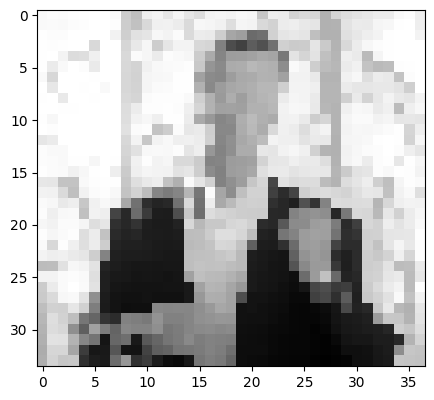

In [101]:
# Let's see what Rick looks like:
data_maxpool = maxpool(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool, cmap='gray')
plt.show()

data_maxpool2 = maxpool(data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool2, cmap='gray')
plt.show()

data_maxpool3 = maxpool(data_maxpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

You can see that the stripes on his shirt gradually turn to white because we keep retaining the brightest local pixels.

In [102]:
# Finally, let's try mean pooling
def meanpool(x_in):
    x_out = np.zeros(( int(np.floor(x_in.shape[0]/2)), int(np.floor(x_in.shape[1]/2)) ))
    # TODO -- write the meanpool routine
    # Replace this line
    for i in range(x_out.shape[0]):
        for j in range(x_out.shape[1]):
            i_in = 2 * i
            j_in = 2 * j
            
            region = x_in[i_in:min(i_in + 2, x_in.shape[0]), 
                          j_in:min(j_in + 2, x_in.shape[1])]
            
            x_out[i,j] = np.mean(region)

    return x_out

In [103]:
print("Original:")
print(orig_4_4)
print("Meanpooled:")
print(meanpool(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Meanpooled:
[[3. 4.]
 [5. 2.]]


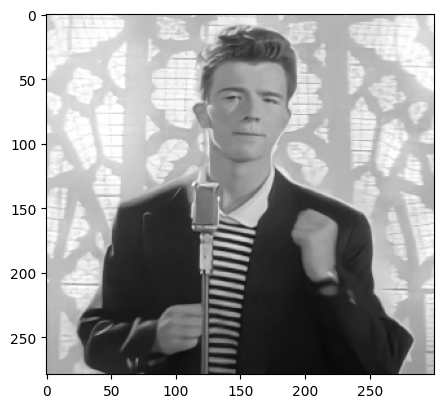

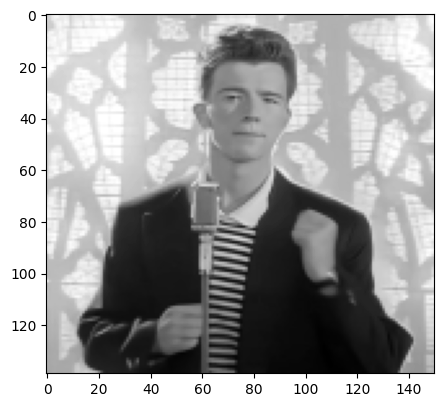

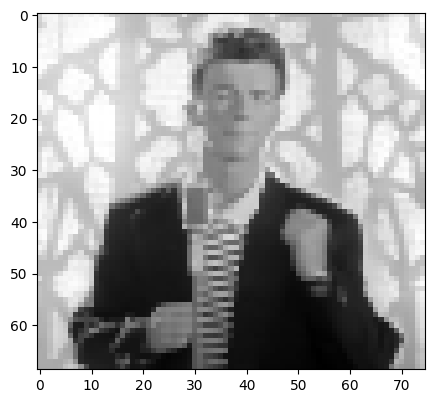

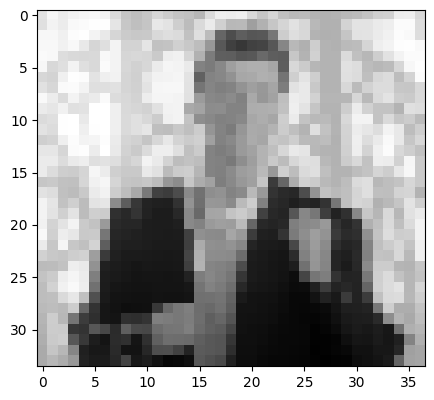

In [104]:
# Let's see what Rick looks like:
data_meanpool = meanpool(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool, cmap='gray')
plt.show()

data_meanpool2 = meanpool(data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool2, cmap='gray')
plt.show()

data_meanpool3 = meanpool(data_meanpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

Notice that the three low resolution images look quite different. <br>

Now let's upscale them again

In [105]:
# Define 2 by 2 original patch
orig_2_2 = np.array([[6, 8], [8,4]])
print(orig_2_2)

[[6 8]
 [8 4]]


In [ ]:
# Let's first use the duplication method
def duplicate(x_in):
    if len(x_in.shape) == 3:  # RGB image
        x_out = np.zeros((x_in.shape[0]*2, x_in.shape[1]*2, x_in.shape[2]), dtype=np.uint8)
    else:
        x_out = np.zeros((x_in.shape[0]*2, x_in.shape[1]*2), dtype=np.uint8)
        
    # TODO -- write the duplication routine
    # Replace this line
    for i in range(x_in.shape[0]):
        for j in range(x_in.shape[1]):
            x_out[2*i, 2*j, ...] = x_in[i,j, ...]     # Top-left
            x_out[2*i, 2*j+1, ...] = x_in[i,j, ...]   # Top-right
            x_out[2*i+1, 2*j, ...] = x_in[i,j, ...]   # Bottom-left
            x_out[2*i+1, 2*j+1, ...] = x_in[i,j, ...] # Bottom-right

    return x_out

In [107]:
print("Original:")
print(orig_2_2)
print("Duplicated:")
print(duplicate(orig_2_2))

Original:
[[6 8]
 [8 4]]
Duplicated:
[[6 6 8 8]
 [6 6 8 8]
 [8 8 4 4]
 [8 8 4 4]]


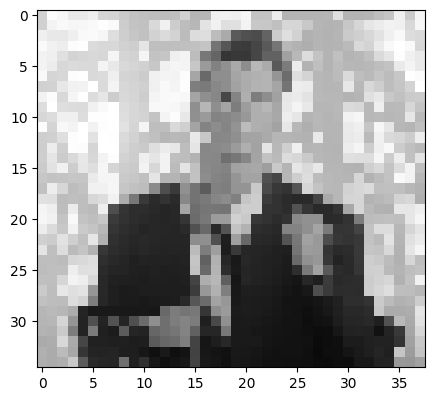

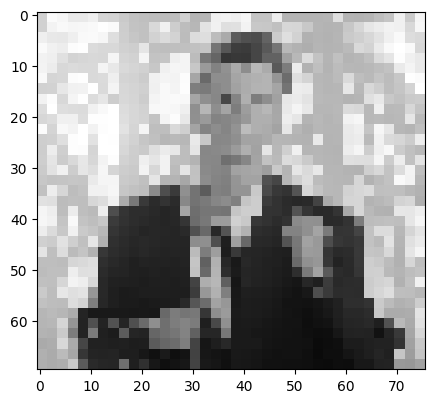

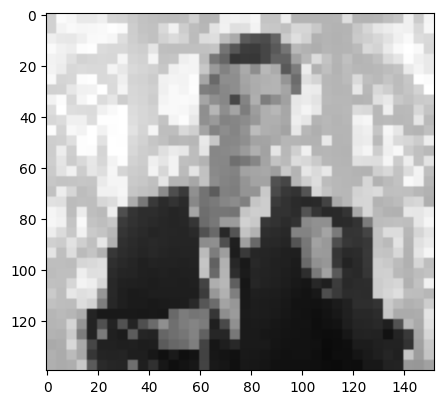

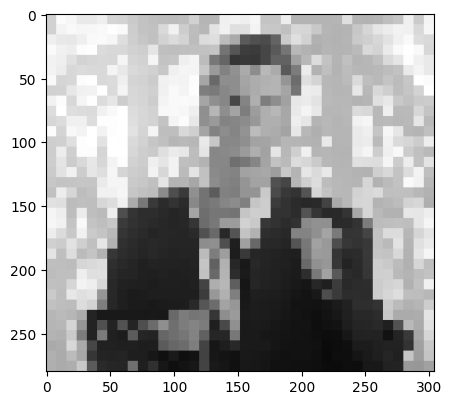

In [108]:
# Let's re-upsample, sub-sampled rick
data_duplicate = duplicate(data_subsample3);

plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_duplicate, cmap='gray')
plt.show()

data_duplicate2 = duplicate(data_duplicate)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate2, cmap='gray')
plt.show()

data_duplicate3 = duplicate(data_duplicate2)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate3, cmap='gray')
plt.show()

They look the same, but if you look at the axes, you'll see that the pixels are just duplicated.

In [ ]:
# Now let's try max pooling back up
# The input x_high_res is the original high res image, from which you can deduce the position of the maximum index
def max_unpool(x_in, x_high_res):
    if len(x_high_res.shape) == 3:  # RGB image
        x_out = np.zeros((x_in.shape[0]*2, x_in.shape[1]*2, x_high_res.shape[2]), dtype=np.uint8)
    else:
        x_out = np.zeros((x_in.shape[0]*2, x_in.shape[1]*2), dtype=np.uint8)
    # TODO -- write the subsampling routine
    # Replace this line
    for i in range(x_in.shape[0]):
        for j in range(x_in.shape[1]):
            # Get the 2x2 block from high res image
            block = x_high_res[2*i:2*i+2, 2*j:2*j+2, ...] if len(x_high_res.shape) == 3 else x_high_res[2*i:2*i+2, 2*j:2*j+2]
            
            # Find position of maximum value in the block
            if len(x_high_res.shape) == 3:
                max_pos = np.unravel_index(np.mean(block, axis=2).argmax(), (2,2))
            else:
                max_pos = np.unravel_index(block.argmax(), (2,2))
            
            # Place the input value at the max position in the output
            if len(x_high_res.shape) == 3:
                x_out[2*i + max_pos[0], 2*j + max_pos[1], :] = x_in[i,j,:]
            else:
                x_out[2*i + max_pos[0], 2*j + max_pos[1]] = x_in[i,j]

    return x_out

In [125]:
print("Original:")
print(orig_2_2)
print("Max unpooled:")
print(max_unpool(orig_2_2,orig_4_4))

Original:
[[6 8]
 [8 4]]
Max unpooled:
[[0 0 0 0]
 [6 0 0 8]
 [0 0 0 4]
 [0 8 0 0]]


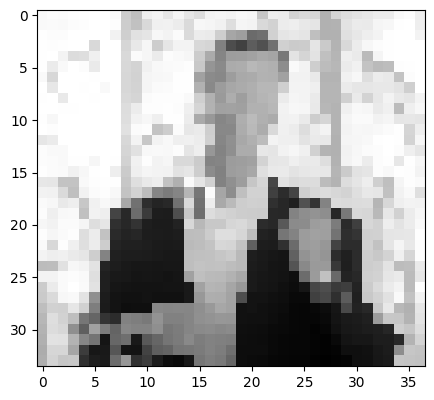

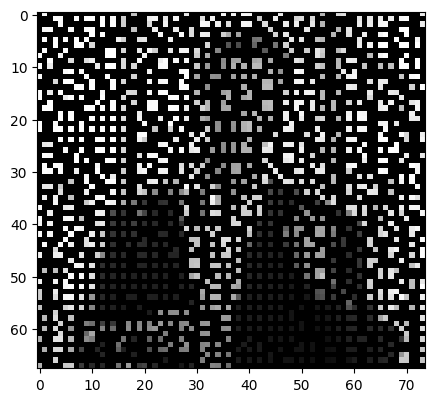

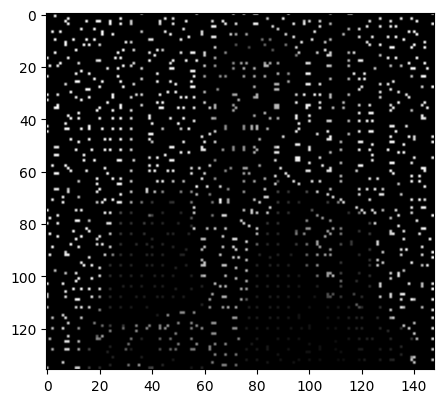

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [126]:
# Let's re-upsample, sub-sampled rick
data_max_unpool= max_unpool(data_maxpool3,data_maxpool2);

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool, cmap='gray')
plt.show()

data_max_unpool2 = max_unpool(data_max_unpool, data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool2, cmap='gray')
plt.show()

data_max_unpool3 = max_unpool(data_max_unpool2, data)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool3, cmap='gray')
plt.show()

Finally, we'll try upsampling using bilinear interpolation.  We'll treat the positions off the image as zeros by padding the original image and round fractional values upwards using np.ceil()

In [ ]:
def bilinear(x_in):
    x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
    x_in_pad = np.zeros((x_in.shape[0]+1, x_in.shape[1]+1))
    x_in_pad[0:x_in.shape[0],0:x_in.shape[1]] = x_in
    # TODO -- write the duplication routine
    # Replace this line
    for i in range(x_in.shape[0]):
        for j in range(x_in.shape[1]):
            # Get the 4 neighboring pixels
            v00 = x_in_pad[i, j]      # Top-left
            v01 = x_in_pad[i, j+1]    # Top-right
            v10 = x_in_pad[i+1, j]    # Bottom-left
            v11 = x_in_pad[i+1, j+1]  # Bottom-right
            
            # 2x2 output block with bilinear interpolation
            x_out[2*i, 2*j] = v00                               # Top-left (original pixel)
            x_out[2*i, 2*j+1] = (v00 + v01) / 2                 # Top-right (horizontal interpolation)
            x_out[2*i+1, 2*j] = (v00 + v10) / 2                 # Bottom-left (vertical interpolation)
            x_out[2*i+1, 2*j+1] = (v00 + v01 + v10 + v11) / 4   # Bottom-right (diagonal interpolation)
    
    return x_out

In [113]:
print("Original:")
print(orig_2_2)
print("Bilinear:")
print(bilinear(orig_2_2))

Original:
[[6 8]
 [8 4]]
Bilinear:
[[6.  7.  8.  4. ]
 [7.  6.5 6.  3. ]
 [8.  6.  4.  2. ]
 [4.  3.  2.  1. ]]


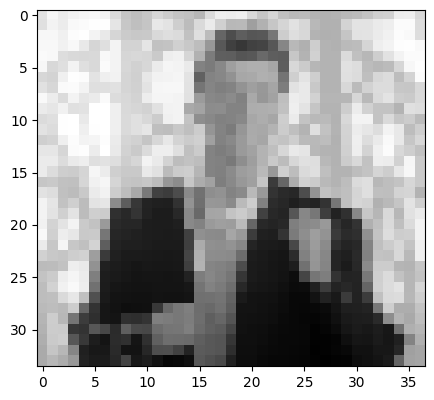

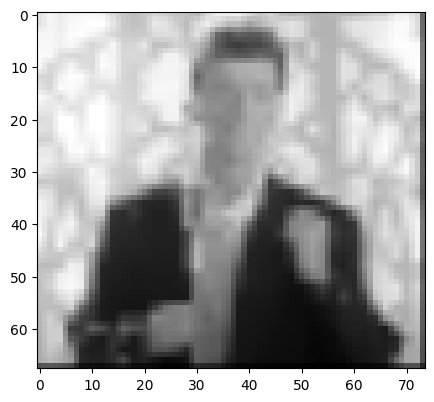

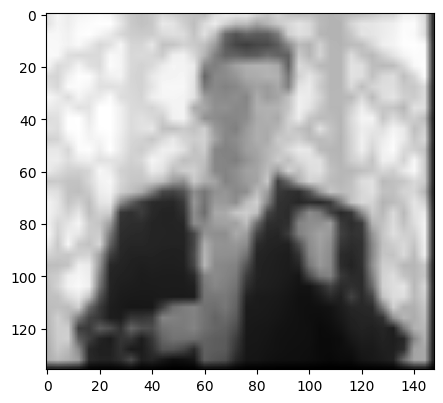

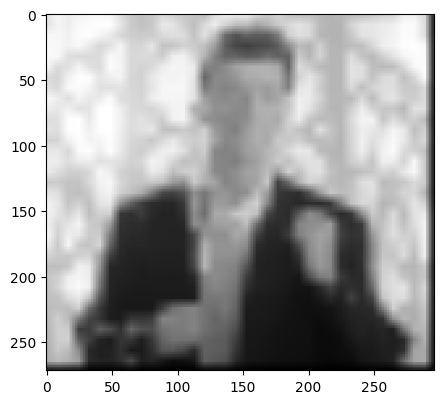

In [114]:
# Let's re-upsample, sub-sampled rick
data_bilinear = bilinear(data_meanpool3);

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_bilinear, cmap='gray')
plt.show()

data_bilinear2 = bilinear(data_bilinear)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear2, cmap='gray')
plt.show()

data_bilinear3 = duplicate(data_bilinear2)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear3, cmap='gray')
plt.show()